In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
dataset = pd.read_csv("D:/Dixant/CDAC/Machine Learning/20-12-21/winequality_red.csv")

In [3]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
data=dataset.loc[:, dataset.columns != 'quality']
data1=dataset.loc[:, dataset.columns == 'quality']

In [6]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [7]:
data1.head()

,quality
0,5
1,5
2,5
3,6
4,5


# Without PCA

In [8]:
X_train, X_test, y_train, y_test = train_test_split(dataset.loc[:, dataset.columns != 'quality'], dataset['quality'], stratify=dataset['quality'],random_state=42)

In [9]:
print(y_train.value_counts())
print(y_test.value_counts())

5    511
6    478
7    149
4     40
8     13
3      8
Name: quality, dtype: int64
5    170
6    160
7     50
4     13
8      5
3      2
Name: quality, dtype: int64


In [10]:
feature_name=list(X_train.columns)
class_name = list(y_train.unique())
print(feature_name)
print(class_name)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
[5, 6, 7, 4, 3, 8]


In [11]:
#Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [12]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.59


In [13]:
list1=[]
for i in range(5,15):
    list1.append(i)

In [14]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth' : list1}

In [15]:
clf= DecisionTreeClassifier(criterion='gini',max_depth=i)

In [16]:
gridsearch = GridSearchCV(clf, param_grid,cv=2)

In [17]:
gridsearch.fit(X_train,y_train)

GridSearchCV(cv=2, estimator=DecisionTreeClassifier(max_depth=14),
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14]})

In [18]:
a=gridsearch.best_params_['max_depth']

In [19]:
a

5

In [20]:
gridsearch.best_score_

0.5679604897050641

In [21]:
clf= DecisionTreeClassifier(criterion='gini',max_depth=a)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [22]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.58


# PCA


In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [24]:
pca=PCA()

In [25]:
pca.fit(data)
pca.explained_variance_ratio_

array([9.46576976e-01, 4.83683046e-02, 2.58917183e-03, 1.51896798e-03,
       8.73553990e-04, 3.45607218e-05, 1.93627614e-05, 9.47278079e-06,
       8.41376628e-06, 1.21472798e-06, 4.68762788e-10])

In [26]:
pca.explained_variance_ratio_.cumsum()

array([0.94657698, 0.99494528, 0.99753445, 0.99905342, 0.99992697,
       0.99996154, 0.9999809 , 0.99999037, 0.99999878, 1.        ,
       1.        ])

Text(0, 0.5, 'Cumulative Explained Variance')

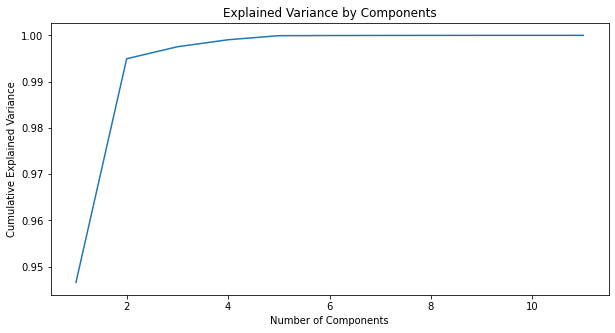

In [27]:
plt.figure(figsize=(10,5))
plt.plot (range (1,12), pca.explained_variance_ratio_.cumsum ())
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [28]:
pca=PCA(n_components= 2)
pca.fit(data)
pca.explained_variance_ratio_
pca.explained_variance_ratio_.cumsum()

array([0.94657698, 0.99494528])

In [29]:
df= pca.transform(data)
print(df)

df1=np.transpose(df)
PCA1=df1[0]
PCA2=df1[1]


[[-13.22490501  -2.02389981]
 [ 22.03772361   4.40832155]
 [  7.16267333  -2.50146086]
 ...
 [ -3.43135351  14.27124349]
 [  1.13287834  16.31616732]
 [ -3.8743766    3.12634754]]


In [30]:
X_train, X_test, y_train, y_test = train_test_split(df, dataset['quality'], stratify=dataset['quality'],random_state=42)

In [31]:
print(y_train.value_counts())
print(y_test.value_counts())

5    511
6    478
7    149
4     40
8     13
3      8
Name: quality, dtype: int64
5    170
6    160
7     50
4     13
8      5
3      2
Name: quality, dtype: int64


In [32]:
#Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [33]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5475


In [34]:
list1=[]
for i in range(5,15):
    list1.append(i)

In [35]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth' : list1}

In [36]:
clf= DecisionTreeClassifier(criterion='gini',max_depth=i)

In [37]:
gridsearch = GridSearchCV(clf, param_grid,cv=5)

In [38]:
gridsearch.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=14),
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14]})

In [39]:
b=gridsearch.best_params_['max_depth']
b

14

In [40]:
gridsearch.best_score_

0.5253974895397491

In [41]:
clf= DecisionTreeClassifier(criterion='gini',max_depth=b)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [42]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.545
